# Modeling Lesson Plan

In [1]:
import pandas as pd
import numpy as np
import wrangle2
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

path='https://gist.githubusercontent.com/ryanorsinger/55ccfd2f7820af169baea5aad3a9c60d/raw/da6c5a33307ed7ee207bd119d3361062a1d1c07e/student-mat.csv'

In [2]:
df, X_train_exp, X_train, y_train, \
    X_validate, y_validate, \
    X_test, y_test = wrangle2.wrangle_student_math(path)

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,guardian,higher,internet,nursery,paid,reason,romantic,school,schoolsup,sex
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

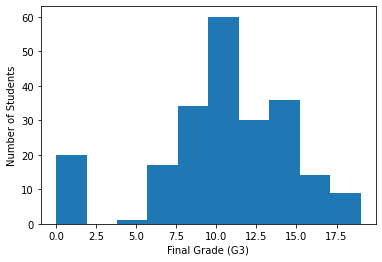

In [5]:
#visualize the data to find out which algorithm to use
plt.hist(y_train)
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.show()

In [6]:
#help determine baseline
y_train.describe()

count    221.000000
mean      10.524887
std        4.509139
min        0.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [7]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [8]:
y_train.head()

,G3
142,11
326,16
88,10
118,8
312,11


In [9]:
y_validate.head()

,G3
241,12
235,10
369,11
217,8
331,14


#### #1 Predict all final grades to be 10.52, which is equal to the mean of G3 for the training sample. Store in y_train['G3_pred_mean'].

In [10]:
G3_pred_mean = y_train['G3'].mean()
y_train['G3_pred_mean'] = G3_pred_mean
y_validate['G3_pred_mean'] = G3_pred_mean

In [11]:
#take a look at predicted mean column added
y_train.head()

,G3,G3_pred_mean
142,11,10.524887
326,16,10.524887
88,10,10.524887
118,8,10.524887
312,11,10.524887


In [12]:
#take a look at predicted mean column added
y_validate.head()

,G3,G3_pred_mean
241,12,10.524887
235,10,10.524887
369,11,10.524887
217,8,10.524887
331,14,10.524887


#### #2 Predict all final grades to be 11, which is equal to the median of G3 for the training sample. Store in y_train['G3_pred_median'].

In [13]:
G3_pred_median = y_train['G3'].median()
y_train['G3_pred_median'] = G3_pred_median
y_validate['G3_pred_median'] = G3_pred_median

In [14]:
#take a look at predicted median column added
y_train.head()

,G3,G3_pred_mean,G3_pred_median
142,11,10.524887,11.0
326,16,10.524887,11.0
88,10,10.524887,11.0
118,8,10.524887,11.0
312,11,10.524887,11.0


In [15]:
#take a look at predicted mean column added
y_validate.head()

,G3,G3_pred_mean,G3_pred_median
241,12,10.524887,11.0
235,10,10.524887,11.0
369,11,10.524887,11.0
217,8,10.524887,11.0
331,14,10.524887,11.0


#### #3 Compute the RMSE comparing actual final grade (G3) to G3_pred_mean.

In [16]:
rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_mean)**(1/2)

In [17]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  4.5 
Validate/Out-of-Sample:  4.58


In [18]:
#RMSE mean for train, validate
rmse_train, rmse_validate

(4.498925523895268, 4.578916932633144)

#### #4 Compute the RMSE comparing actual final grade (G3) to G3_pred_median.

In [19]:
rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_median)**(1/2)

In [20]:
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Median
Train/In-Sample:  4.52 
Validate/Out-of-Sample:  4.69


In [21]:
#RMSE median for train, validate
rmse_train, rmse_validate

(4.523943340540008, 4.69265944125279)

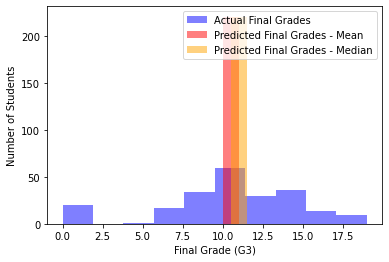

In [22]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.G3, color='blue', alpha=.5, label="Actual Final Grades")
plt.hist(y_train.G3_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Final Grades - Mean")
plt.hist(y_train.G3_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Final Grades - Median")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.legend()
plt.show()

<hr style="border:2px solid black"> </hr>

## LinearRegression Model (OLS)

In [24]:
#create the model
lm= LinearRegression(normalize=True)

In [25]:
#fit (on train only)
#because we changed y_train into a dataframe, the column MUST be specified
lm.fit(X_train, y_train.G3)

LinearRegression(normalize=True)

In [26]:
# predict train dataset
y_train['G3_pred_lm'] = lm.predict(X_train)

In [27]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_lm)**(1/2)

In [28]:
# predict validate dataset
y_validate['G3_pred_lm'] = lm.predict(X_validate)

In [29]:
# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_lm)**(1/2)

In [30]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  1.7503546500121143 
Validation/Out-of-Sample:  2.1264081323553436
